In [1]:
%pylab inline
import numpy as np
from conway99 import *
import pickle

Populating the interactive namespace from numpy and matplotlib


# A representative seed graph
We start from an arbitrary vertex and its neighbours. These can necessarily be arranged as 7 blades of a fan; we fix a numbering with vertex 0 the centre, 1-14 its neighbours, and blade edges 1-2, 3-4, 5-6, 7-8, 9-10, 11-12, 13-14

In [2]:
seed15 = np.empty((15,15), dtype='int')
for i in range(15):
    for j in range(15):
        seed15[i,j] = 0

# 1-14 all nhbrs of 0
for i in range(1,15):
    seed15[0,i] = 1
    seed15[i,0] =1
    
# By fixing an ordering, a single representative suffices
for i in [1,3,5,7,9,11,13]:
    seed15[i,i+1] = 1
    seed15[i+1,i] = 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


C:\Users\Graeme\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


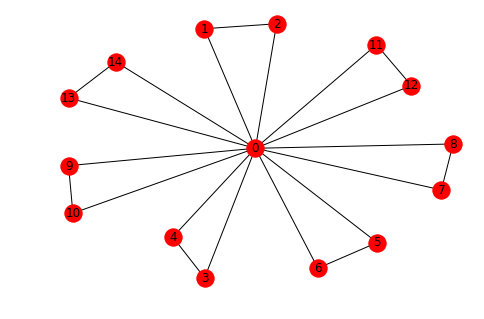

In [3]:
# review
print(seed15)
plot_given_edges(seed15)

In [4]:
# Verify some details
assert len(seed15)*len(seed15) == num_known_zeros(seed15) + num_known_ones(seed15) + num_unknowns(seed15)
assert not(has_unknown_values(seed15))
assert lambda_compatible(seed15)
assert mu_compatible(seed15)
assert meets_adjacency_requirements(seed15, debug=True)
assert graph_is_valid(seed15)

# Adding vertex 15
(NB, as we started numbering at 0, this is our 16th vertex)

wlog, we let this be a neighbour of vertex 1

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0]]


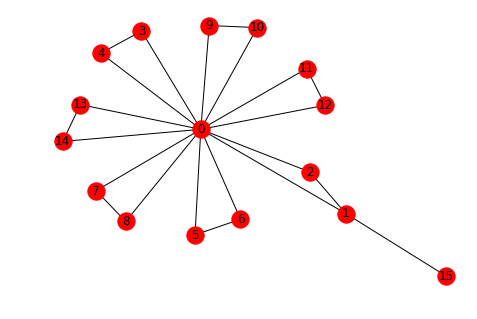

In [5]:
# Generate template with an additional vertex, and review
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15)])
print(seed16)
plot_given_edges(seed16)

In [6]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=0)

Wall time: 32.9 ms


In [7]:
# Reduce to eliminate equivalent graphs
rep16 = reduce_mod_equivalence(super16, verbose=True)

	1 reps from 1 candidates


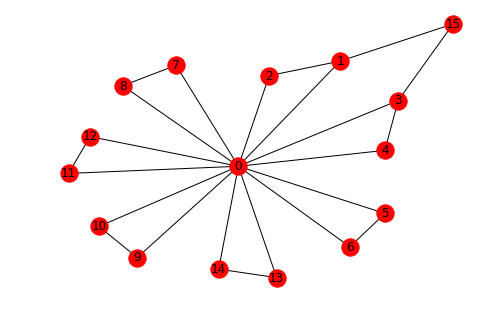

In [8]:
# Turns out, there's only really one way to extend this! Let's take a look
plot_given_edges(rep16[0])

This was expected:

By mu=2 condition, as 15 is not a nhbr of 0, they have 2 mutual nhbrs
 * As the nhbrs of 0 are 1-14, 15 nhbrs two of these.
 * We assumed 1-15 already; this prevents 2-15 (else 1,2 are nhbrs with two mutual nhbrs - 0, 15 - violating lambda=1) 
 * So 15 nhbrs precisely 1 of vertices 3-14, and these 12 choices are equivalent
 * So to fix notation we can force this nhbr to be vertex 14
 
Moreover, we could have applied this at the template stage to reduce the search space.

[[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
 [1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 1 2 2 2 2 2 2 2 2 2 2 2 2 1 0]]


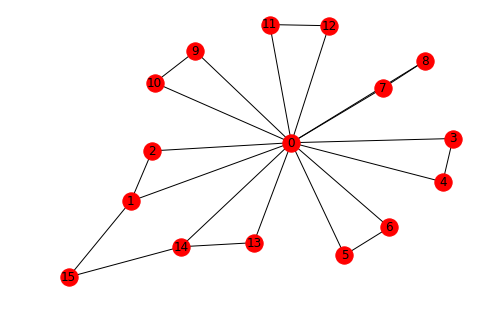

In [9]:
# alternative template 
seed16 = get_supermatrix_template(seed15, forced_edges=[(1,15), (15,14)])
print(seed16)
plot_given_edges(seed16)

In [10]:
# Fill in the template
%time super16 = templates_to_valid_graphs([seed16], verbose=0)

Wall time: 4.95 ms


In [11]:
len(super16)

1

In [12]:
# For convenience, can wrap up the templating, search, and reduction steps for a list of seed graphs
%time rep16 = find_valid_supergraphs([seed15], forced_edges=[(1,15), (15,14)])

2020-07-08 15:23:43.550333: Starting with 1 seeds
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
Currently 0 graphs, 1 candidates
2020-07-08 15:23:43.556316: 1 valid graphs from templates
	1 reps from 1 candidates
2020-07-08 15:23:43.556316: Reduced to 1 representatives
Wall time: 5.98 ms


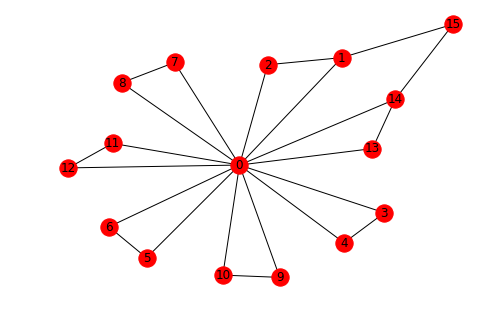

In [13]:
# confirm this is what we expected from the individual steps:
plot_given_edges(rep16[0])

# Saturating vertex 1

We proceed with a similar approach to the other search, but now handled as part of the logic instead of prescribing (non-)edges. 

Specifically, this version identifies the unsaturated vertex _v_ of highest degree, picking the lowest index one if there are multiples. We then iterate over the vertices u=0,1,2,...; checking whether the correct number of mutual neighbours are present (1 if u neighbours v, 2 if it does not). We pick the minimal u such that there is a missing mutual neighbour with v, and set our newly added vertex to be that mutual neighbour. 

In [14]:
%time rep17 = find_valid_supergraphs_greedy(rep16, verbose=False)

2020-07-08 15:24:02.963272: Starting with 1 seeds
2020-07-08 15:24:02.969258: 2 valid graphs from templates
2020-07-08 15:24:02.970255: Reduced to 2 representatives
Wall time: 6.98 ms


In [15]:
%time rep18 = find_valid_supergraphs_greedy(rep17, verbose=False)

2020-07-08 15:24:03.979553: Starting with 2 seeds
2020-07-08 15:24:03.995511: 4 valid graphs from templates
2020-07-08 15:24:03.996508: Reduced to 3 representatives
Wall time: 17 ms


In [16]:
%time rep19 = find_valid_supergraphs_greedy(rep18, verbose=False)

2020-07-08 15:24:04.841289: Starting with 3 seeds
2020-07-08 15:24:04.874195: 8 valid graphs from templates
2020-07-08 15:24:04.875201: Reduced to 6 representatives
Wall time: 34.9 ms


In [17]:
%time rep20 = find_valid_supergraphs_greedy(rep19, verbose=False)

2020-07-08 15:24:05.615477: Starting with 6 seeds
2020-07-08 15:24:05.692265: 16 valid graphs from templates
2020-07-08 15:24:05.694224: Reduced to 7 representatives
Wall time: 78.7 ms


In [18]:
%time rep21 = find_valid_supergraphs_greedy(rep20, verbose=False)

2020-07-08 15:24:06.422660: Starting with 7 seeds
2020-07-08 15:24:06.543320: 24 valid graphs from templates
2020-07-08 15:24:06.546277: Reduced to 15 representatives
Wall time: 124 ms


In [19]:
%time rep22 = find_valid_supergraphs_greedy(rep21, verbose=False)

2020-07-08 15:24:07.318416: Starting with 15 seeds
2020-07-08 15:24:07.611666: 51 valid graphs from templates
2020-07-08 15:24:07.618610: Reduced to 15 representatives
Wall time: 301 ms


In [20]:
%time rep23 = find_valid_supergraphs_greedy(rep22, verbose=False)

2020-07-08 15:24:09.990543: Starting with 15 seeds
2020-07-08 15:24:10.382482: 60 valid graphs from templates
2020-07-08 15:24:10.391458: Reduced to 33 representatives
Wall time: 401 ms


In [21]:
%time rep24 = find_valid_supergraphs_greedy(rep23, verbose=False)

2020-07-08 15:24:11.561338: Starting with 33 seeds
2020-07-08 15:24:12.531733: 131 valid graphs from templates
2020-07-08 15:24:12.551679: Reduced to 29 representatives
Wall time: 990 ms


In [22]:
%time rep25 = find_valid_supergraphs_greedy(rep24, verbose=False)

2020-07-08 15:24:14.324109: Starting with 29 seeds
2020-07-08 15:24:15.422167: 134 valid graphs from templates
2020-07-08 15:24:15.443116: Reduced to 67 representatives
Wall time: 1.12 s


In [23]:
%time rep26 = find_valid_supergraphs_greedy(rep25, verbose=False)

2020-07-08 15:24:17.019501: Starting with 67 seeds
2020-07-08 15:24:19.838992: 305 valid graphs from templates
2020-07-08 15:24:19.889824: Reduced to 54 representatives
Wall time: 2.87 s


In [24]:
%time rep27 = find_valid_supergraphs_greedy(rep26, verbose=False)

2020-07-08 15:24:21.445116: Starting with 54 seeds
2020-07-08 15:24:24.215699: 11 valid graphs from templates
2020-07-08 15:24:24.217694: Reduced to 11 representatives
Wall time: 2.77 s


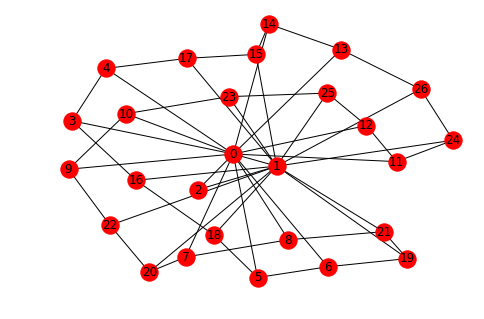

In [25]:
# Review an example

plot_given_edges(rep27[0])

In [26]:
# Confirm this has saturated vertex 1 in all examples
deg_of_1 = [sum(r[1]) for r in rep27]
assert min(deg_of_1) == 14
assert max(deg_of_1) == 14

# Continuing to grow

The logic will now seek to introduce neighbours for vertex 3 rather than vertex 2, since it is of higher degree. 


In [27]:
%time rep28 = find_valid_supergraphs_greedy(rep27, verbose=False)

2020-07-08 15:24:32.339459: Starting with 11 seeds
2020-07-08 15:24:33.499353: 131 valid graphs from templates
2020-07-08 15:24:33.523290: Reduced to 66 representatives
Wall time: 1.18 s


In [28]:
%time rep29 = find_valid_supergraphs_greedy(rep28, verbose=False)

2020-07-08 15:24:36.292213: Starting with 66 seeds
2020-07-08 15:25:09.383716: 5871 valid graphs from templates
2020-07-08 15:25:10.424933: Reduced to 3588 representatives
Wall time: 34.1 s


In [29]:
%time rep30 = find_valid_supergraphs_greedy(rep29, verbose=False)

2020-07-08 15:25:55.424580: Starting with 3588 seeds
2020-07-08 16:05:34.111700: 296543 valid graphs from templates
2020-07-08 16:06:29.237229: Reduced to 223200 representatives
Wall time: 40min 33s


Expect we would hit the memory issue if we proceeded with this many seeds!

In [ ]:
pickle.dump( rep30, open( "fullsearch_sat-30.p", "wb" ) )